# Sorted sampling issue

**Goal:** ...
  
This notebook is divided in two parts:
* **1. Bla**

In [1]:
%run ../setup_environment.ipy
%run ../Selene_Job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

# Local test fold

## Get *shuffled* sampling

In [64]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [65]:
X_shuffled, y_shuffled = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_shuffled, y_shuffled)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [66]:
data.get_original_impact()['patient_key'].head()

83138     P-0029172
193823    P-0002232
94891     P-0019875
180448    P-0013581
5390      P-0001042
Name: patient_key, dtype: object

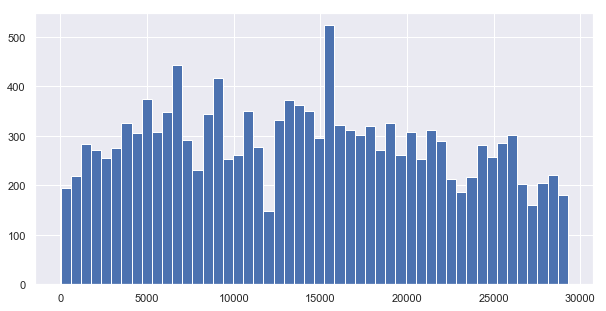

In [67]:
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

X: (7199, 45) | y: (7199,)


,count_,freq_
True,7199,100.0%


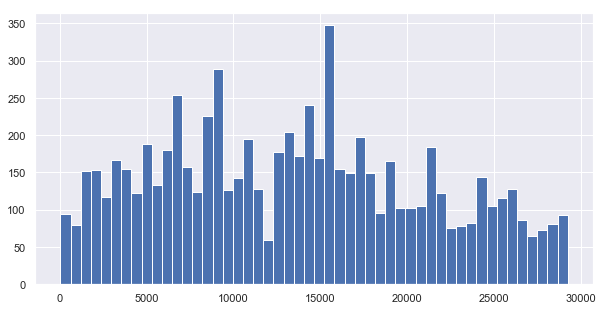

In [68]:
X_temp, y_temp = data.get_X_and_y('all', range(4 * data.positive_class_number, 4 * data.positive_class_number))
Impact_Wrapper.print_info(X_temp, y_temp)
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

## Get *sorted* sampling

In [69]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [87]:
X_sorted, y_sorted = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_sorted, y_sorted)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [83]:
data.get_original_impact()['patient_key'].head()

75712     P-0012508
194060    P-0029250
85586     P-0013886
174354    P-0026257
184908    P-0027929
Name: patient_key, dtype: object

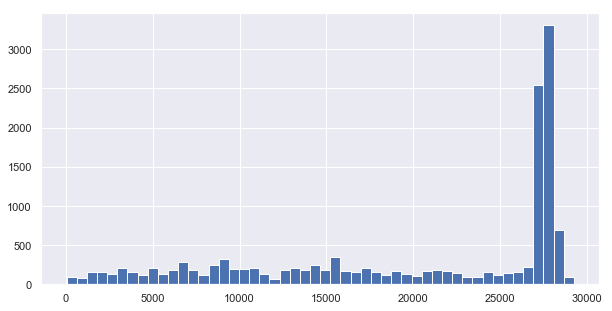

In [84]:
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


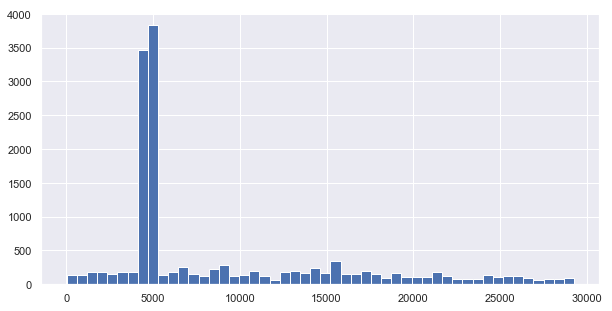

In [73]:
X_temp, y_temp = data.get_X_and_y('all', range(3 * data.positive_class_number, 4 * data.positive_class_number))
Impact_Wrapper.print_info(X_temp, y_temp)
plt.figure(figsize=(10, 5))
plt.hist(data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])), bins = 50);

## Ridge Regression (L2 regularization)

In [74]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [75]:
summary = Summary(['accuracy', 'f1', 'recall', 'precision', 'roc_auc', 'average_precision'])

In [88]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (3.36s)
▴ Mean accuracy         : 0.778 ± 0.004
▴ Mean f1               : 0.745 ± 0.004
▴ Mean roc_auc          : 0.847 ± 0.008
▴ Mean average_precision: 0.879 ± 0.004
▴ Mean recall           : 0.646 ± 0.008
▴ Mean precision        : 0.879 ± 0.015

Run model... done! (3.64s)
▴ Mean accuracy         : 0.820 ± 0.003
▴ Mean f1               : 0.803 ± 0.005
▴ Mean roc_auc          : 0.891 ± 0.005
▴ Mean average_precision: 0.912 ± 0.003
▴ Mean recall           : 0.737 ± 0.015
▴ Mean precision        : 0.883 ± 0.011


In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (5.79s)
▴ Mean accuracy         : 0.778 ± 0.004
▴ Mean f1               : 0.745 ± 0.004
▴ Mean roc_auc          : 0.847 ± 0.008
▴ Mean average_precision: 0.879 ± 0.004
▴ Mean recall           : 0.646 ± 0.008
▴ Mean precision        : 0.879 ± 0.015

Run model... done! (3.81s)
▴ Mean accuracy         : 0.820 ± 0.003
▴ Mean f1               : 0.803 ± 0.005
▴ Mean roc_auc          : 0.891 ± 0.005
▴ Mean average_precision: 0.912 ± 0.003
▴ Mean recall           : 0.737 ± 0.015
▴ Mean precision        : 0.883 ± 0.011


## Random Forest

In [18]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RandomForest_shuffled', 'indigo')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RandomForest_sorted', 'navy')

Run model... done! (24.53s)
▴ Mean accuracy         : 0.819 ± 0.010
▴ Mean f1               : 0.801 ± 0.011
▴ Mean roc_auc          : 0.895 ± 0.008
▴ Mean average_precision: 0.915 ± 0.007
▴ Mean recall           : 0.730 ± 0.013
▴ Mean precision        : 0.887 ± 0.009

Run model... done! (25.56s)
▴ Mean accuracy         : 0.861 ± 0.004
▴ Mean f1               : 0.854 ± 0.005
▴ Mean roc_auc          : 0.935 ± 0.004
▴ Mean average_precision: 0.945 ± 0.004
▴ Mean recall           : 0.814 ± 0.009
▴ Mean precision        : 0.899 ± 0.004


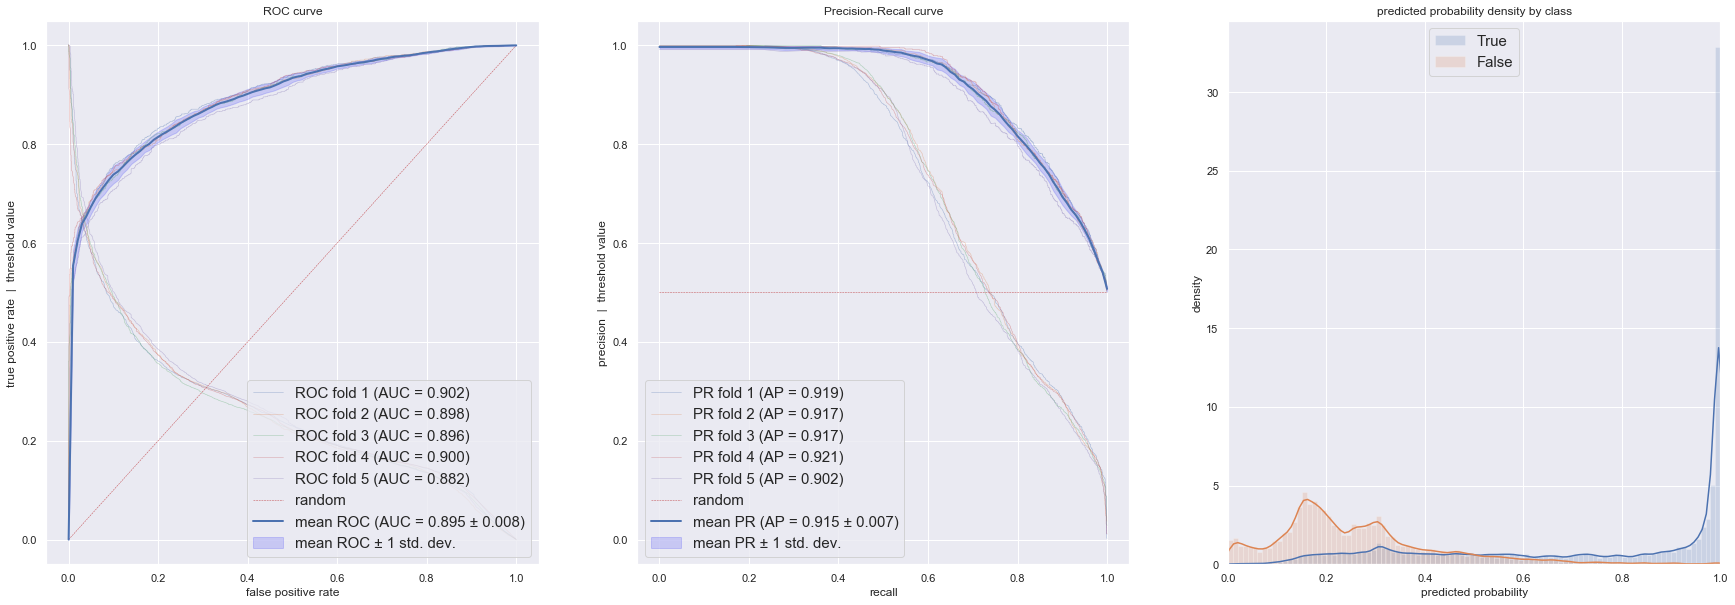

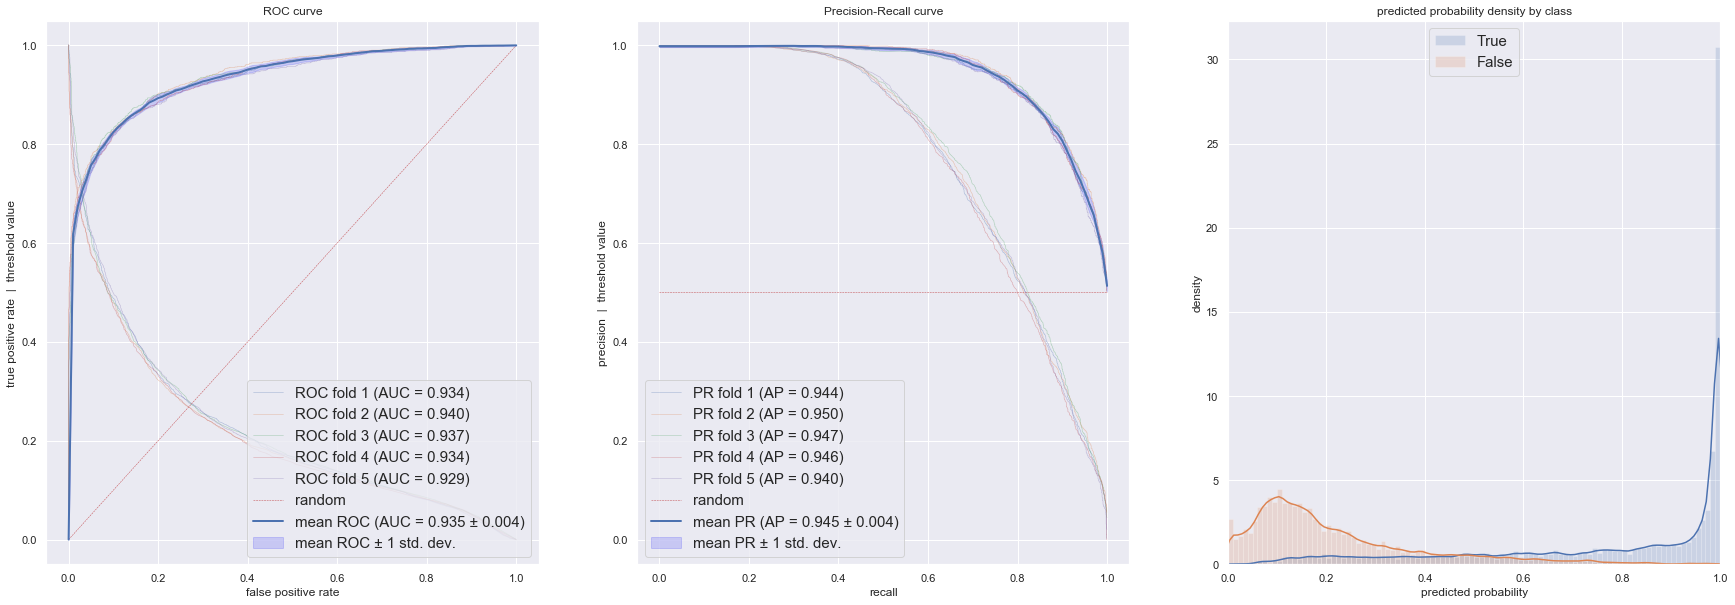

In [19]:
metrics_shuffled.plot_threshold_decision_curves()
metrics_sorted.plot_threshold_decision_curves()

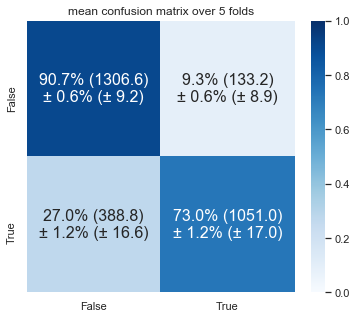

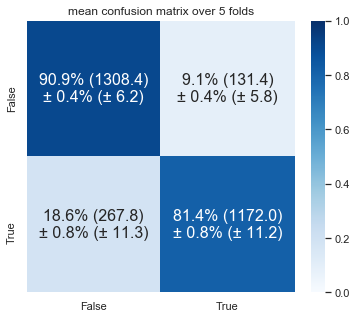

In [20]:
metrics_shuffled.plot_mean_confusion_matrix()
metrics_sorted.plot_mean_confusion_matrix()

,test_accuracy_mean,test_f1_mean,test_recall_mean,test_precision_mean,test_roc_auc_mean,test_average_precision_mean
metrics_name,,,,,,
RidgeRegression_shuffled,0.778,0.745,0.646,0.879,0.847,0.879
RidgeRegression_sorted,0.82,0.803,0.737,0.883,0.891,0.912
RandomForest_shuffled,0.819,0.801,0.73,0.887,0.895,0.915
RandomForest_sorted,0.861,0.854,0.814,0.899,0.935,0.945


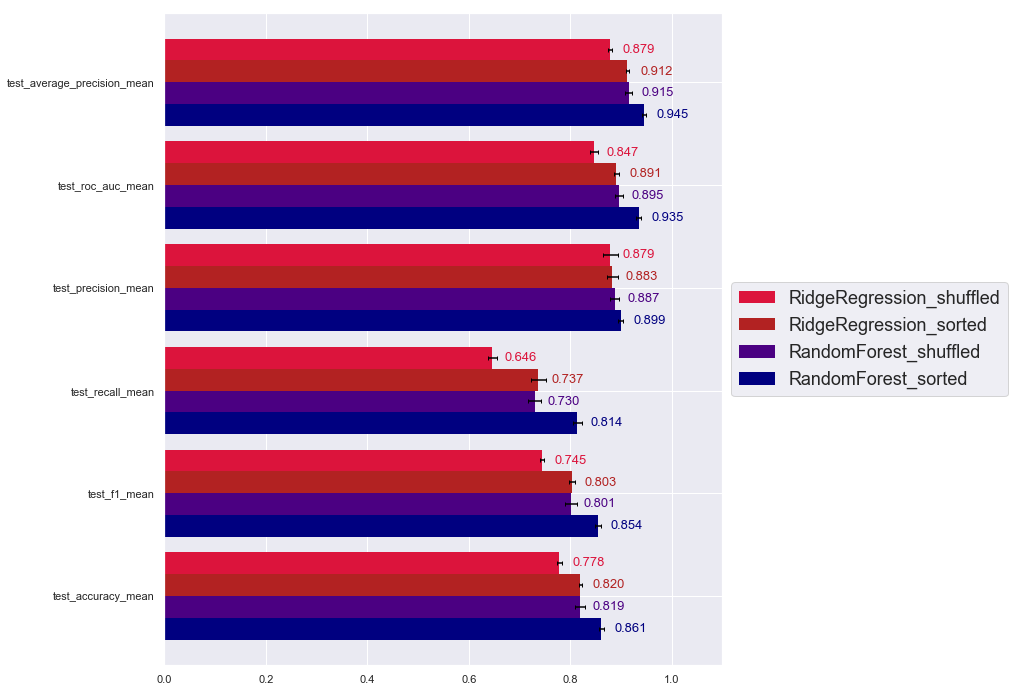

In [21]:
summary.display()
summary.plot()

# Global test fold

## Get *shuffled* sampling

In [22]:
class CustomFolds:
    def __init__(self, X, y, X_small, y_small, cv_strategy):
        self.train_indices = []
        self.test_indices  = []
        
        for i, (train_index_X_small, test_index_X_small) in enumerate(cv_strategy.split(X_small, y_small)):
            print('  - fold %d/%d...' % (i + 1, cv_strategy.get_n_splits()))
            print('Train ({:6d}): {}'.format(len(train_index_X_small), train_index_X_small))
            print('Test  ({:6d}): {}'.format(len(test_index_X_small) , test_index_X_small))

            # We do the transformations:
            # real index for X_small -> label index (for both X_small and X) -> real index for X
            train_index_label = X_small.iloc[train_index_X_small].index
            train_index_X  = np.array([X.index.get_loc(i) for i in train_index_label])

            test_index_X = np.array(list(set(range(0, X.shape[0])) - set(train_index_X)))

            print('Train ({:6d}): {}'.format(len(train_index_X), train_index_X))
            print('Test  ({:6d}): {}'.format(len(test_index_X) , test_index_X))

            self.train_indices.append(train_index_X)
            self.test_indices.append(test_index_X)
            
            display(get_table(y_small.iloc[test_index_X_small]))
            display(get_table(y.iloc[test_index_X]))

            print()
    
    
    def split(self, X, y, groups=None):
        for train_index, test_index in zip(self.train_indices, self.test_indices):
            yield train_index, test_index

    def get_n_splits(self, groups=None):
        return len(self.train_indices)

In [23]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [24]:
X_all_shuffled, y_all_shuffled = data.get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X_all_shuffled, y_all_shuffled)

X: (194211, 45) | y: (194211,)


,count_,freq_
False,187012,96.3%
True,7199,3.7%


In [25]:
custom_cv_shuffled = CustomFolds(X_all_shuffled, y_all_shuffled, X_shuffled, y_shuffled, cv_strategy)

  - fold 1/5...
Train ( 11518): [ 2862  2863  2864 ... 14395 14396 14397]
Test  (  2880): [   0    1    2 ... 2896 2897 2898]
Train ( 11518): [187722  28725 149659 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 2/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [2862 2863 2864 ... 5798 5803 5804]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 3/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [5690 5691 5694 ... 8642 8643 8645]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 4/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [ 8633  8634  8635 ... 11538 11539 11541]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 5/5...
Train ( 11520): [    0     1     2 ... 11538 11539 11541]
Test  (  2878): [11485 11487 11488 ... 14395 14396 14397]
Train ( 11520): [105031 130342 105374 ... 158451 114724 188577]
Test  (182691): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1439,50.0%
False,1439,50.0%


,count_,freq_
False,181252,99.2%
True,1439,0.8%


In [26]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [27]:
X_all_sorted, y_all_sorted = data.get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X_all_sorted, y_all_sorted)

X: (194211, 45) | y: (194211,)


,count_,freq_
False,187012,96.3%
True,7199,3.7%


In [28]:
custom_cv_sorted = CustomFolds(X_all_sorted, y_all_sorted, X_sorted, y_sorted, cv_strategy)

  - fold 1/5...
Train ( 11518): [ 2862  2863  2864 ... 14395 14396 14397]
Test  (  2880): [   0    1    2 ... 2896 2897 2898]
Train ( 11518): [187722  28725 149659 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 2/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [2862 2863 2864 ... 5798 5803 5804]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 3/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [5690 5691 5694 ... 8642 8643 8645]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 4/5...
Train ( 11518): [    0     1     2 ... 14395 14396 14397]
Test  (  2880): [ 8633  8634  8635 ... 11538 11539 11541]
Train ( 11518): [105031 130342 105374 ... 165217 165959 136166]
Test  (182693): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1440,50.0%
False,1440,50.0%


,count_,freq_
False,181253,99.2%
True,1440,0.8%



  - fold 5/5...
Train ( 11520): [    0     1     2 ... 11538 11539 11541]
Test  (  2878): [11485 11487 11488 ... 14395 14396 14397]
Train ( 11520): [105031 130342 105374 ... 158451 114724 188577]
Test  (182691): [     0      1      2 ... 194208 194209 194210]


,count_,freq_
True,1439,50.0%
False,1439,50.0%


,count_,freq_
False,181252,99.2%
True,1439,0.8%


## Ridge Regression (L2 regularization)

In [29]:
summary = Summary(['accuracy', 'f1', 'recall', 'precision', 'roc_auc', 'average_precision'])

In [30]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_all_shuffled, y_all_shuffled, custom_cv_shuffled, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_all_sorted, y_all_sorted, custom_cv_sorted, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (11.75s)
▴ Mean accuracy         : 0.912 ± 0.008
▴ Mean f1               : 0.105 ± 0.007
▴ Mean roc_auc          : 0.848 ± 0.006
▴ Mean average_precision: 0.273 ± 0.004
▴ Mean recall           : 0.646 ± 0.008
▴ Mean precision        : 0.057 ± 0.004

Run model... done! (11.28s)
▴ Mean accuracy         : 0.708 ± 0.004
▴ Mean f1               : 0.038 ± 0.001
▴ Mean roc_auc          : 0.803 ± 0.010
▴ Mean average_precision: 0.227 ± 0.013
▴ Mean recall           : 0.737 ± 0.015
▴ Mean precision        : 0.020 ± 0.000


## Random Forest

In [33]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_shuffled = Metrics(model, X_all_shuffled, y_all_shuffled, custom_cv_shuffled, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RandomForest_shuffled', 'indigo')
print()
metrics_sorted = Metrics(model, X_all_sorted, y_all_sorted, custom_cv_sorted, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RandomForest_sorted', 'navy')

Run model... done! (310.80s)
▴ Mean accuracy         : 0.903 ± 0.002
▴ Mean f1               : 0.107 ± 0.003
▴ Mean roc_auc          : 0.894 ± 0.005
▴ Mean average_precision: 0.338 ± 0.013
▴ Mean recall           : 0.730 ± 0.013
▴ Mean precision        : 0.057 ± 0.002

Run model... done! (347.38s)
▴ Mean accuracy         : 0.681 ± 0.004
▴ Mean f1               : 0.039 ± 0.001
▴ Mean roc_auc          : 0.855 ± 0.005
▴ Mean average_precision: 0.305 ± 0.007
▴ Mean recall           : 0.814 ± 0.009
▴ Mean precision        : 0.020 ± 0.000


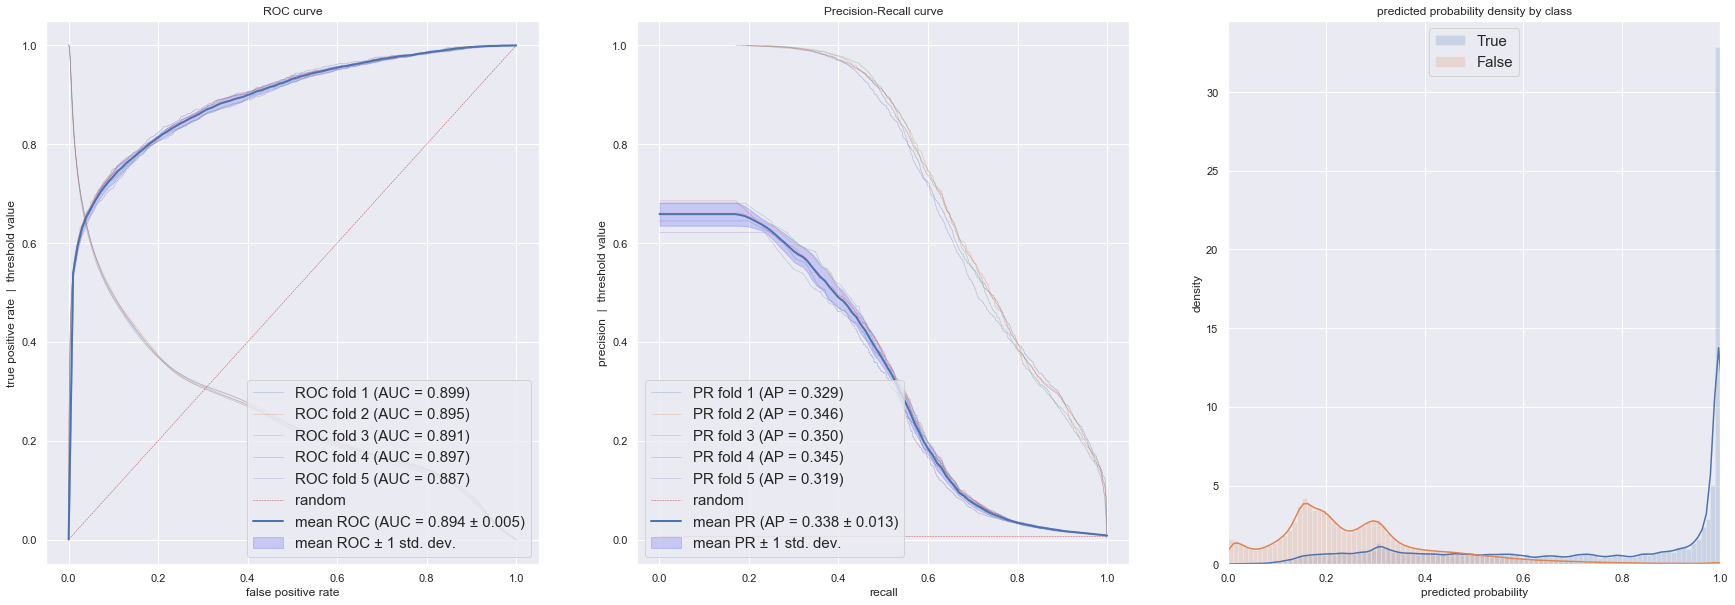

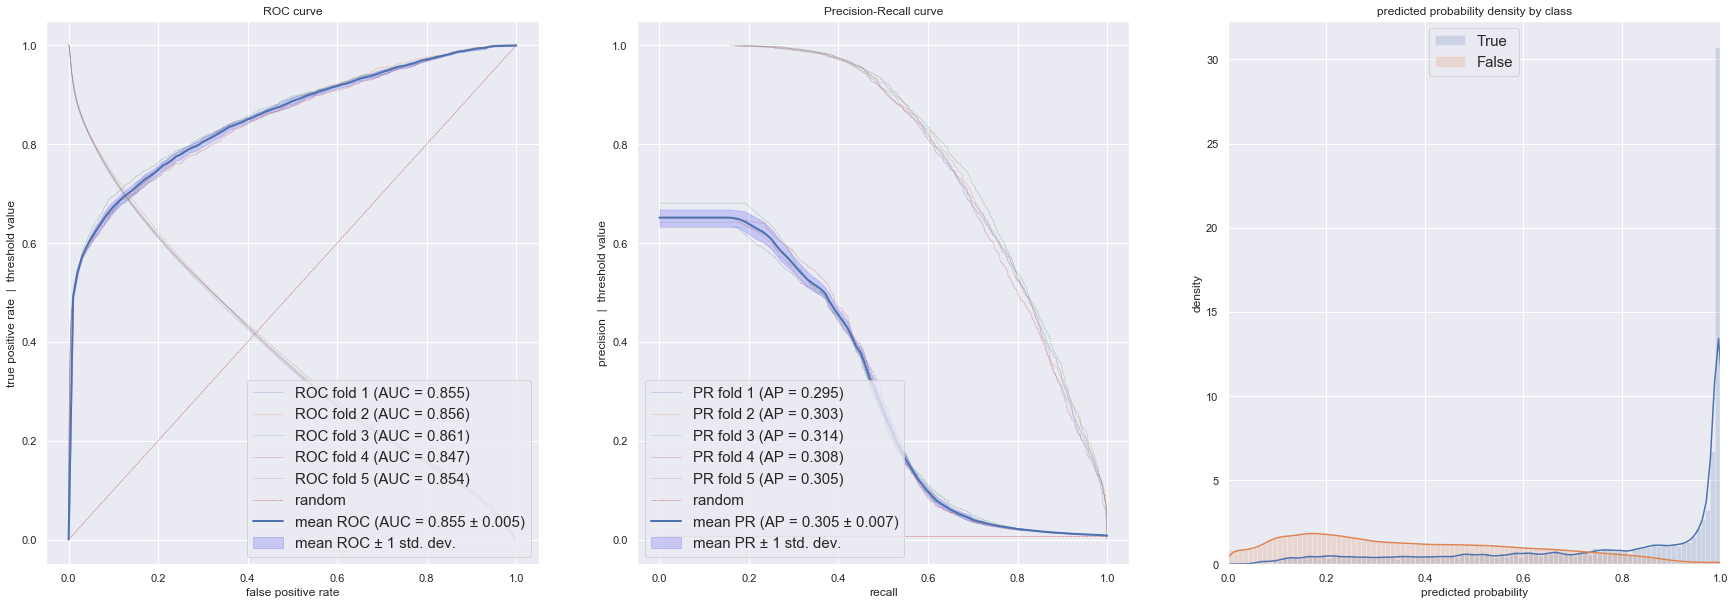

In [34]:
metrics_shuffled.plot_threshold_decision_curves()
metrics_sorted.plot_threshold_decision_curves()

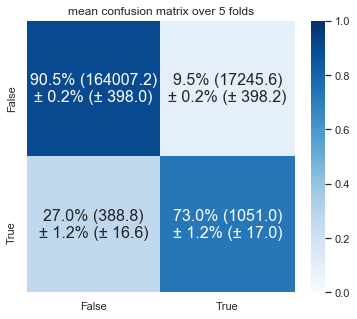

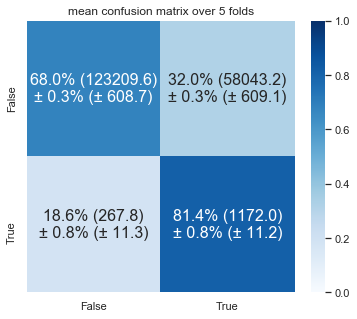

In [35]:
metrics_shuffled.plot_mean_confusion_matrix()
metrics_sorted.plot_mean_confusion_matrix()

,test_accuracy_mean,test_f1_mean,test_recall_mean,test_precision_mean,test_roc_auc_mean,test_average_precision_mean
metrics_name,,,,,,
RidgeRegression_shuffled,0.912,0.105,0.646,0.0569,0.848,0.273
RidgeRegression_sorted,0.708,0.0382,0.737,0.0196,0.803,0.227
RandomForest_shuffled,0.903,0.107,0.73,0.0575,0.894,0.338
RandomForest_sorted,0.681,0.0386,0.814,0.0198,0.855,0.305


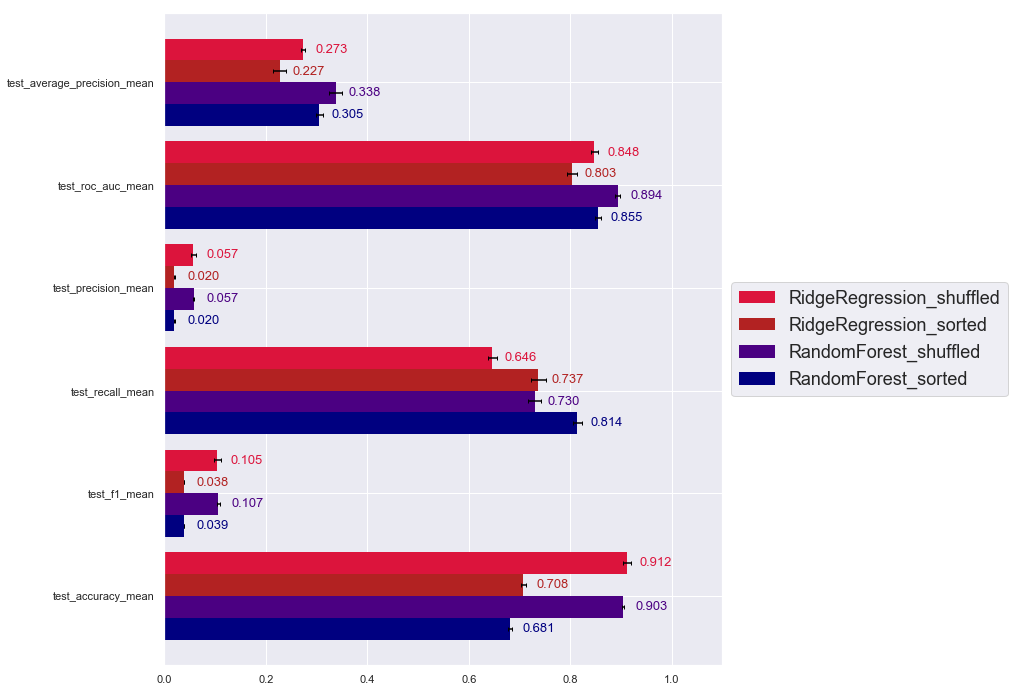

In [36]:
summary.display()
summary.plot()

# GroupKFold

## Get *shuffled* sampling

In [37]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=True)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [38]:
X_shuffled, y_shuffled = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_shuffled, y_shuffled)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [39]:
groups_shuffled = data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])).values

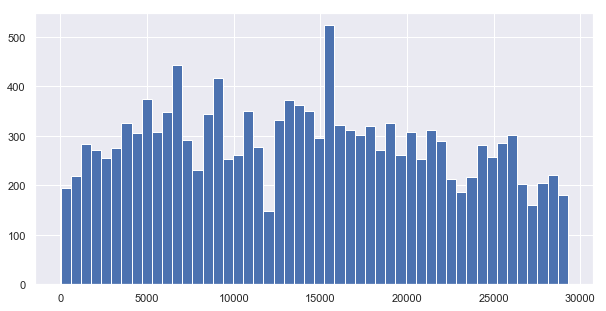

In [40]:
plt.figure(figsize=(10, 5))
plt.hist(groups_shuffled, bins = 50);

## Get *sorted* sampling

In [41]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact', shuffle=False)

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [42]:
X_sorted, y_sorted = data.get_X_and_y('all', range(0, data.positive_class_number))
Impact_Wrapper.print_info(X_sorted, y_sorted)

X: (14398, 45) | y: (14398,)


,count_,freq_
True,7199,50.0%
False,7199,50.0%


In [43]:
groups_sorted = data.get_original_impact()['patient_key'].apply(lambda x: int(x[2:])).values

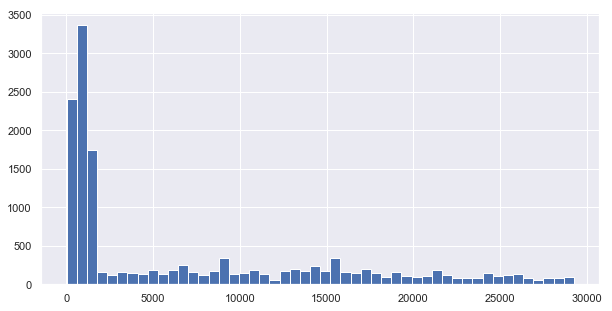

In [44]:
plt.figure(figsize=(10, 5))
plt.hist(groups_sorted, bins = 50);

## Ridge Regression (L2 regularization)

In [45]:
from sklearn.model_selection import GroupKFold
cv_strategy = GroupKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [46]:
summary = Summary(['accuracy', 'f1', 'recall', 'precision', 'roc_auc', 'average_precision'])

In [47]:
%run ../metrics.py

<Figure size 432x288 with 0 Axes>

In [48]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([('scale'   , StandardScaler()),
                  ('classify', LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))])

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, groups=groups_shuffled, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RidgeRegression_shuffled', 'crimson')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, groups=groups_sorted, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RidgeRegression_sorted', 'firebrick')

Run model... done! (6.76s)
▴ Mean accuracy         : 0.779 ± 0.018
▴ Mean f1               : 0.747 ± 0.022
▴ Mean roc_auc          : 0.846 ± 0.018
▴ Mean average_precision: 0.878 ± 0.013
▴ Mean recall           : 0.652 ± 0.028
▴ Mean precision        : 0.875 ± 0.021

Run model... done! (7.49s)
▴ Mean accuracy         : 0.815 ± 0.021
▴ Mean f1               : 0.799 ± 0.014
▴ Mean roc_auc          : 0.888 ± 0.016
▴ Mean average_precision: 0.911 ± 0.010
▴ Mean recall           : 0.735 ± 0.017
▴ Mean precision        : 0.877 ± 0.031


## Random Forest

In [51]:
# choose a model and run it
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=500, random_state=42)

metrics_shuffled = Metrics(model, X_shuffled, y_shuffled, cv_strategy, groups=groups_shuffled, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_shuffled.print_mean()
summary.add(metrics_shuffled, 'RandomForest_shuffled', 'indigo')
print()
metrics_sorted = Metrics(model, X_sorted, y_sorted, cv_strategy, groups=groups_sorted, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall', 'precision'])
metrics_sorted.print_mean()
summary.add(metrics_sorted, 'RandomForest_sorted', 'navy')

Run model... done! (53.94s)
▴ Mean accuracy         : 0.814 ± 0.013
▴ Mean f1               : 0.795 ± 0.015
▴ Mean roc_auc          : 0.889 ± 0.010
▴ Mean average_precision: 0.911 ± 0.010
▴ Mean recall           : 0.720 ± 0.019
▴ Mean precision        : 0.887 ± 0.021

Run model... done! (58.90s)
▴ Mean accuracy         : 0.850 ± 0.014
▴ Mean f1               : 0.843 ± 0.008
▴ Mean roc_auc          : 0.920 ± 0.013
▴ Mean average_precision: 0.936 ± 0.005
▴ Mean recall           : 0.801 ± 0.016
▴ Mean precision        : 0.889 ± 0.013


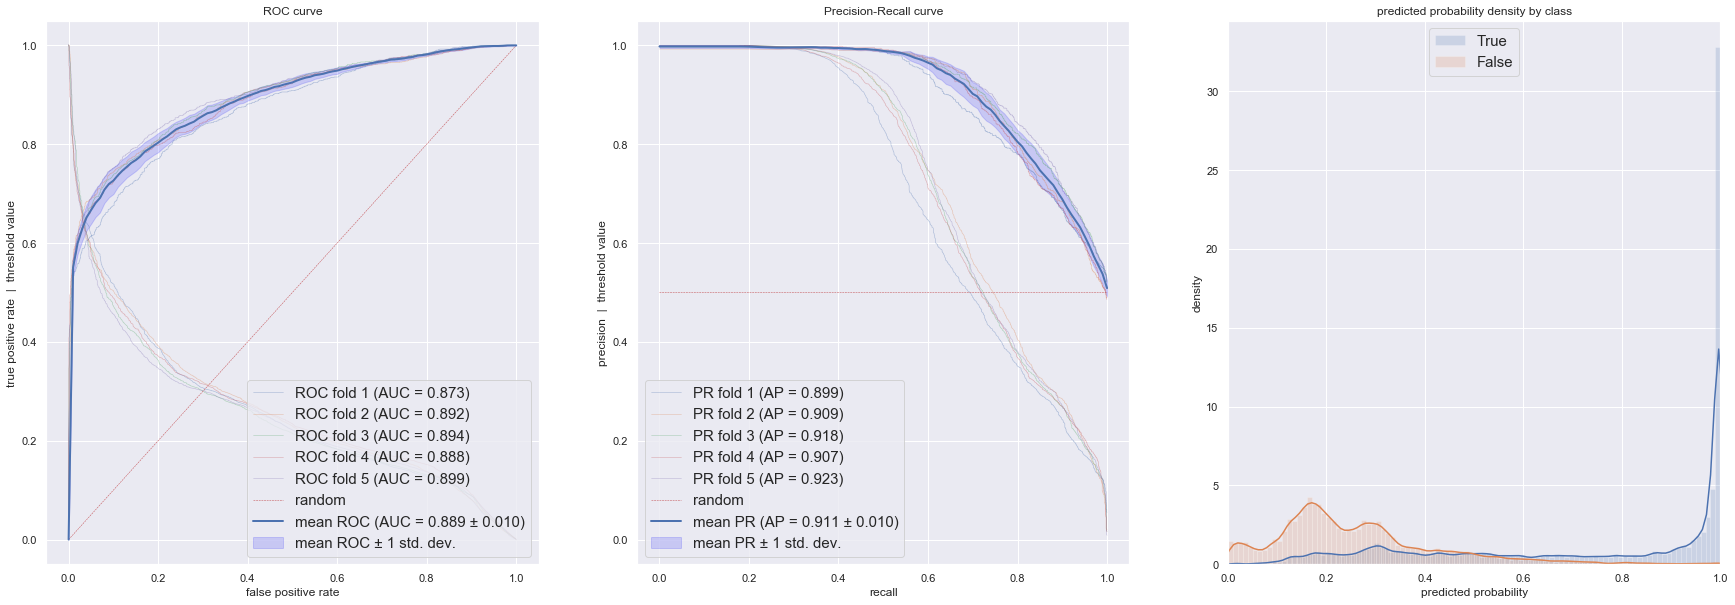

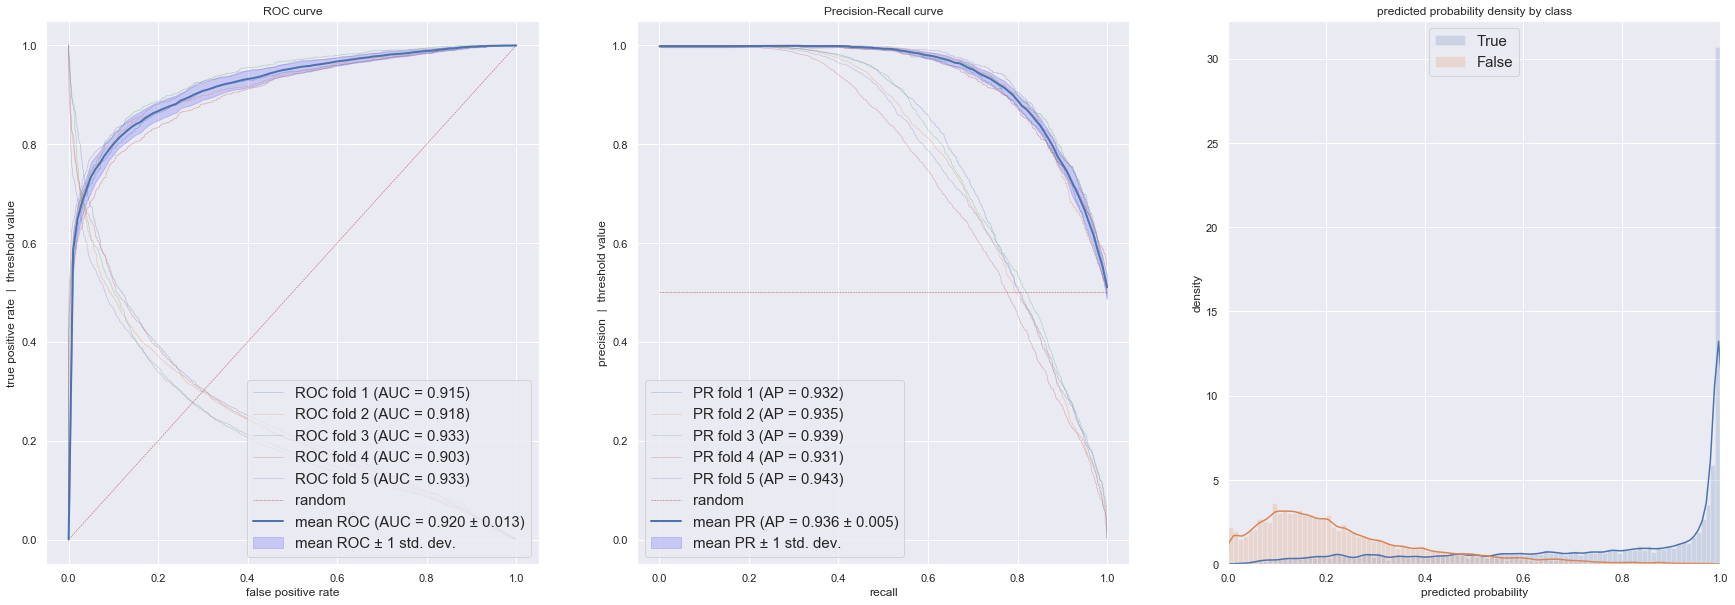

In [52]:
metrics_shuffled.plot_threshold_decision_curves()
metrics_sorted.plot_threshold_decision_curves()

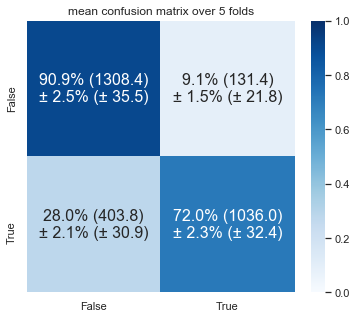

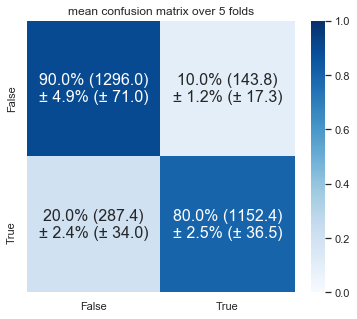

In [53]:
metrics_shuffled.plot_mean_confusion_matrix()
metrics_sorted.plot_mean_confusion_matrix()

,test_accuracy_mean,test_f1_mean,test_recall_mean,test_precision_mean,test_roc_auc_mean,test_average_precision_mean
metrics_name,,,,,,
RidgeRegression_shuffled,0.779,0.747,0.652,0.875,0.846,0.878
RidgeRegression_sorted,0.815,0.799,0.735,0.877,0.888,0.911
RandomForest_shuffled,0.814,0.795,0.72,0.887,0.889,0.911
RandomForest_sorted,0.85,0.843,0.801,0.889,0.92,0.936


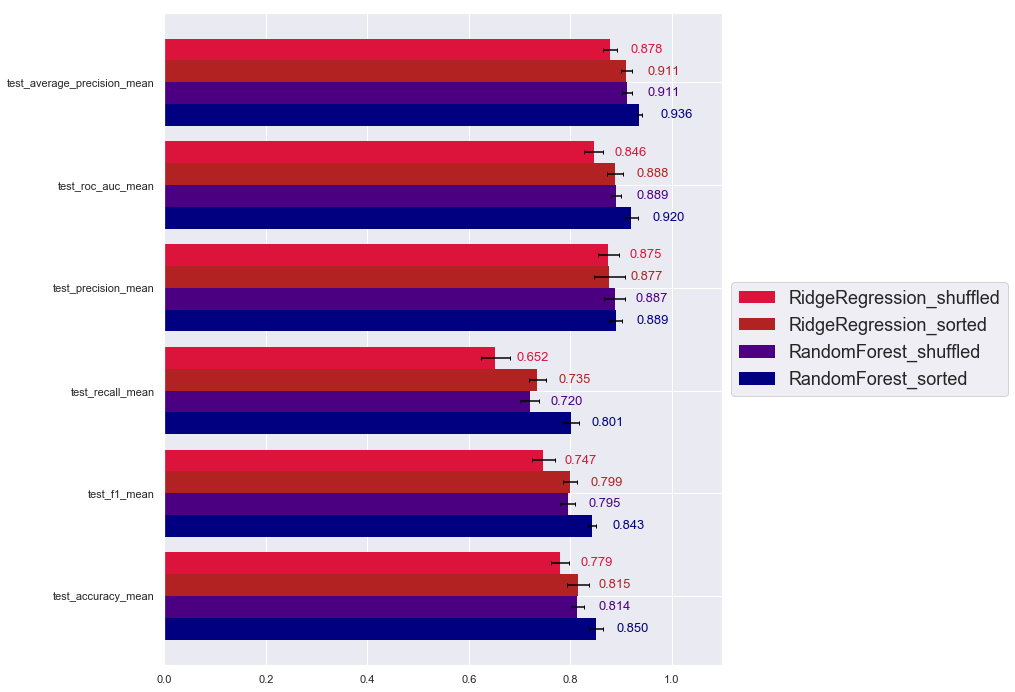

In [54]:
summary.display()
summary.plot()